In [ ]:
#project :p9
#submitter : lqin33
#partner : mjiao5

In [1]:
import os, json, csv
from collections import namedtuple

In [2]:
#draft:
#def find_values(key = "review id", value = "84440", return_value = "review text"):
# '''idx = "1"
#     name = "review" + idx + '.csv'
#     csv_data_1 = read_files(name, file_type = ".csv")
#     for i in csv_data_1:
#         if i[key] == value:
#             return i[return_value]
#         else: 
#             idx = str(int(idx) + 1)'''    
# # '''def get_reviews2():
    
#     csv_1 = read_files(name = 'review2.csv')
#     json_1 = read_files(name = 'review2.json')
#     list_1 = []
#     for i in range(len(json_1)):
#         try:
#     #if csv_1[i]['review id'] is not '' :
#             review_id  = int(csv_1[i]['review id'])
#         #idx +=1
#     #if csv_1[i]['review date'] is not '' and csv_1[i]['review date'] is not None:
#             date = csv_1[i]['review date']
#         #idx +=1
#     #if csv_1[i]['review do_recommend'] is not '' :
#         #try:
#             do_recommend = bool(csv_1[i]['review do_recommend'])
#             #idx +=1
#         #except:
#             #print('he')
#     #if csv_1[i]['review num_helpful'] is not '':
#             num_helpful = int(csv_1[i]['review num_helpful'])
#         #idx +=1
#     #if csv_1[i]['review title'] is not '':
#             title = csv_1[i]['review title']
#         #idx +=1
#     #if csv_1[i]['review text'] is not '':
#             text = csv_1[i]['review text']
#         #idx +=1
#     #if csv_1[i]['review rating'] is not '' :
#         #try:
#             rating = int(csv_1[i]['review rating'])
#             #idx +=1
#         #except:
#         #    print('he')
#     #if review_id or review_id is not '' :
#             username = json_1[csv_1[i]['review id']][0]
#             asin = json_1[csv_1[i]['review id']][1]
#         #idx +=1
#     #if idx == 8:
#             review = Review(review_id, username, asin, title, text, rating, do_recommend, num_helpful, date)
#             list_1.append(review)
#         except:
#             continue
#     return list_1
    
# get_reviews2()'''

# dict1={1:[1,11,111],2:[2,22,222]}
# dict2={3:[3,33,333],4:[4,44,444]}


# dictMerged2={**dict1, **dict2}
# dictMerged2

In [3]:
#q1
def find_names(i = "data"):
    return sorted(os.listdir(i), reverse = True)
    
find_names("data")

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json',
 '.DS_Store']

In [4]:
def find_paths(i = "data"):
    list_1 = []
    for obj in os.listdir(i):
        list_1.append(os.path.join("data", obj))
    return(sorted(list_1, reverse = True))

def find_paths_filter_dot(i = "data"):
    list_1 = []
    for obj in os.listdir(i):
        if obj[0] != '.':
            list_1.append(os.path.join(i, obj))
    return(sorted(list_1, reverse = True))   


['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json',
 'data/.DS_Store']

In [56]:
#q2
find_paths_filter_dot()

['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json']

In [5]:
#Q3: What are the paths of all the JSON files present in data directory?
def find_input_files(i = "data", key = ".json", num = 1):
    list_1 = find_names(i)
    list_2 = []
    for i in list_1:
        if num == 1 and os.path.splitext(i)[num] == key :
                list_2.append(os.path.join("data", i))     
        elif num == 0 and i.startswith(key):
            list_2.append(os.path.join("data", i))
            
    return sorted(list_2, reverse = True)
find_input_files(i = "data", key = ".json")

['data/sample_reviews.json',
 'data/review5.json',
 'data/review4.json',
 'data/review3.json',
 'data/review2.json',
 'data/review1.json',
 'data/products.json']

In [6]:
#Q4: What are the paths of all the files present in data directory, that begin with the phrase 'review'?
find_input_files(key = "review", num = 0)

['data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv']

In [7]:
name = "products.json"
name.endswith('.csv')

False

In [8]:
def read_files(path = "data", name = "products.json"):
    if name.endswith('.json'):
        f = open(os.path.join(path, name), encoding="utf-8")
        reader = json.load(f)
    elif name.endswith('.csv'):
        f = open(os.path.join(path, name), encoding="utf-8")
        reader = list(csv.DictReader(f))
        reader = json.loads(json.dumps(reader))
            
    else:
        reader = "Input wrong type of file"
    return(reader)

In [9]:
#Q5: What are the products in products.json?
read_files()

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [10]:
csv_data_1 = read_files(name = "review1.csv")

In [11]:
def find_all_csv_files(file = "data"):
    list_1 = find_names(file)
    list_2 = []
    for i in list_1:
        if i.startswith('review') and i.endswith('.csv'):
            list_2.append(i)
    return list_2

def find_all_json_files(file = "data"):
    list_1 = find_names(file)
    list_2 = []
    for i in list_1:
        if i.startswith('review') and i.endswith('.json'):
            list_2.append(i)
    return list_2

def find_values(key = "review id", value = "84440", return_value = "review text", num = False):
    for file in find_all_csv_files("data"):
        file_1 = read_files(name = file)
        for i in file_1:
            if i[key] == value :
                if num == True:
                    return file
                else:
                    return i[return_value]

In [12]:
#Q6: What is the review text of review with id 84440?
find_values(value = "84440")
            

'I would recommend this product. It works great and ver compact.'

In [13]:
#Q7: What is the review text of review with id 28615?
find_values(value = "28615")

'Loveeeeeeeee........................................'

In [14]:
#Q8: What file contained the review with id 69273?
find_values(value = "69273", num = True)

'review2.csv'

In [15]:
#Q9: What is the data stored in sample_reviews.json?
read_files(path = "data", name = "sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [16]:
Review = namedtuple('Review', ['id', 'username', 'asin', 'title', 'text', 'rating', 'do_recommend', 'num_helpful', 'date'])

In [17]:
#Q10: What is produced by your function get_reviews('sample_reviews.csv', 'sample_reviews.json')
def find_what_contained_in_file(filename):
    list_1 = []
    csv_1 = read_files(path = "data", name = filename)
    for obj in range(len(csv_1)):
        for idx in csv_1[obj]:
            list_1.append(idx)
            #list_1.append(idx.split(' ')[1])
    return sorted(list(set(list_1)))

find_what_contained_in_file('sample_reviews.csv')
    
def get_reviews(csvfile, jsonfile):
    csv_1 = read_files(name = csvfile)
    json_1 = read_files(name = jsonfile)
    list_1 = []
    for i in range(len(json_1)):
        idx = 0
        if csv_1[i]['review id'] is not '' :
            review_id  = int(csv_1[i]['review id'])
            idx +=1
        if csv_1[i]['review date'] is not '' and csv_1[i]['review date'] is not None:
            date = csv_1[i]['review date']
            idx +=1
        if csv_1[i]['review do_recommend'] is not '' and csv_1[i]['review do_recommend'] is not None :
            if csv_1[i]['review do_recommend'].lower() == 'true':
                do_recommend = True
                idx +=1
            elif csv_1[i]['review do_recommend'].lower() == 'false':
                do_recommend = False
                idx +=1        
        if csv_1[i]['review num_helpful'] is not '' and csv_1[i]['review num_helpful'] is not None:
            num_helpful = int(csv_1[i]['review num_helpful'])
            idx +=1
        if csv_1[i]['review title'] is not '':
            title = csv_1[i]['review title']
            idx +=1
        if csv_1[i]['review text'] is not '':
            text = csv_1[i]['review text']
            idx +=1
        if csv_1[i]['review rating'] is not '' :
            try:
                rating = int(csv_1[i]['review rating'])
                idx +=1
            except:
                continue
        if idx == 7:
            if review_id is not None or review_id is not '' :
                username = json_1[csv_1[i]['review id']][0]
                asin = json_1[csv_1[i]['review id']][1]
                idx +=1
        if idx == 8:
            review = Review(review_id, username, asin, title, text, rating, do_recommend, num_helpful, date)
            list_1.append(review)
    return list_1
    
get_reviews('sample_reviews.csv', 'sample_reviews.json')

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [18]:
#Q11: What are the first ten Review objects in the list produced by get_reviews('review4.csv', 'review4.json')?
get_reviews('review4.csv', 'review4.json')[:10]

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [19]:
#Q12: What are the last ten Review objects in the list produced by get_reviews('review2.csv', 'review2.json')?
get_reviews('review2.csv', 'review2.json')[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [20]:
def find_object_in_review(value = 25401):
    list_1 = []
    for file in find_all_csv_files("data"):
        file_1 = file
        file_2 = file.split('.')[0]+'.json'
        try:
            reviews = get_reviews(file_1, file_2)
            for i in reviews:
                if i.id == value:
                    return i
        except:
            print('Some of the json files are broken.')
    
        

In [21]:
#Q13: What is the Review object with review id 25401?
find_object_in_review()

Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [22]:
#Q14: What is the Review object with review id 78626?
find_object_in_review(value = 78626)

Some of the json files are broken.


Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [23]:
def sort_reviews():
    list_1 = []
    for file in find_all_csv_files("data"):
        file_1 = file
        file_2 = file.split('.')[0]+'.json'
        try:
            reviews = get_reviews(file_1, file_2)
            for i in reviews:
                list_1.append(i)
        except:
            print('Some of the json files are broken.')
    return sorted(list_1, reverse = True, key = lambda x:x[1])

reviews = sort_reviews()

Some of the json files are broken.


In [24]:
#Q15: List the first ten Review objects in the entire dataset, when the usernames are sorted in the reverse alphabetical order.
reviews[:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [25]:
def bucketize(attr, attr2='username'):
    bucket = {}
    keys = []
    for review in reviews:
        if not getattr(review, attr2) in keys:
            keys.append(getattr(review, attr2))

    list_1 = []

    for key in keys:
        idx = 0
        for review in reviews:
            if not type(getattr(review, attr)) == int:
                if getattr(review, attr2) == key:
                    idx += 1
            else:
                if getattr(review, attr2) == key:
                    idx += int(getattr(review, attr))           
        bucket[key] = idx
                    
    return bucket

In [26]:
reviews_by_username = bucketize('username')

In [27]:
#Q16: Who are the top 22 prolific users in this dataset?
sorted_reviews = sorted(reviews_by_username.items(), key = lambda x:x[1], reverse = True)
dict(sorted_reviews[:22])

{'Susan': 4,
 'Missy': 4,
 'Mike': 4,
 'Dave': 4,
 '1234': 4,
 'steve': 3,
 'paul': 3,
 'Susie': 3,
 'Steve': 3,
 'Richard': 3,
 'Michael': 3,
 'Manny': 3,
 'Lisa': 3,
 'Kathy': 3,
 'John': 3,
 'James': 3,
 'Grandma': 3,
 'Frank': 3,
 'Chris': 3,
 'Bubba': 3,
 'Bill': 3,
 'Angie': 3}

In [28]:
list_sorted_num_helpful_reviews = sorted(bucketize('num_helpful').items(), key = lambda x:x[1], reverse = True)
dict_sorted_num_helpful_reviews = dict(list_sorted_num_helpful_reviews)

In [29]:
def larger_than_5(x):
    if dict_sorted_num_helpful_reviews[x] >= 5:
        return x
def larger_than_1(x):
    if dict_sorted_num_helpful_reviews[x] >= 1:
        return x

In [30]:
#Q17: Who are the users whose comments have been found helpful at least five times?
at_least_five_times = len(list(filter(larger_than_5, dict_sorted_num_helpful_reviews)))
dict(list_sorted_num_helpful_reviews[:at_least_five_times])

{'Earthdog': 27,
 'Ellen': 10,
 'Stuartc': 8,
 'Rodge': 6,
 'trouble': 5,
 'Raza': 5,
 'Mark': 5,
 'Kime': 5,
 'Karch': 5,
 'FrankW': 5,
 '1Briansapp': 5}

In [31]:
%matplotlib inline

In [32]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

    
def bar_chart(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.bar(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
#     ax.get_xaxis().get_major_formatter().set_scientific(False)
#     ax.get_yaxis().get_major_formatter().set_scientific(False)

In [33]:
def relate_a_to_b(a,b):
    keys = []
    list_1 = []
    bucket = {}
    for review in reviews:
        if not getattr(review, a) in keys:
            keys.append(getattr(review, a))

    for key in keys:
        length = 0
        number = 0
        for review in reviews:
            if getattr(review, a) == key:
                length += len(getattr(review, b))
                number += 1
        bucket[key] = length/number
         
    return bucket     

In [34]:
def from_dict_to_scatter(dict_1, a,b):
    keys = list(dict_1.keys())
    values = list(dict_1.values())
    scatter(keys,values,xlabel = a, ylabel = b)
    

def from_dict_to_bar_chart(dict_1, a,b):
    keys = list(dict_1.keys())
    values = list(dict_1.values())
    bar_chart(keys,values,xlabel = a, ylabel = b)

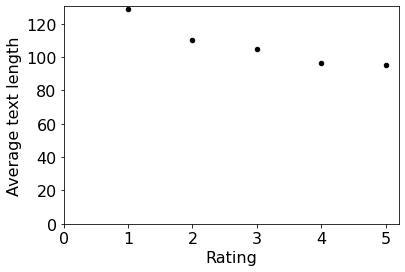

In [35]:
#Q18: What is the relationship between the rating and the average text length?
rating_vs_length = relate_a_to_b('rating','text')
keys_1 = list(rating_vs_length.keys())
values_1 = list(rating_vs_length.values())
scatter(keys_1, values_1, xlabel="Rating", ylabel="Average text length")

In [36]:
def find_rating_vs_reviews(attr):
    bucket = {}
    keys = []
    list_1 = []
    for review in reviews:
        if not getattr(review, 'rating') in keys:
            keys.append(getattr(review,'rating'))
    for key in keys:
        num_1 = 0
        numbers = 0
        for review in reviews:
            if getattr(review, 'rating') == key:
                if getattr(review, attr) == 0:
                    numbers += 1
                else:
                    numbers +=1
                    num_1 += 1
        bucket[key] = num_1/numbers
    return bucket

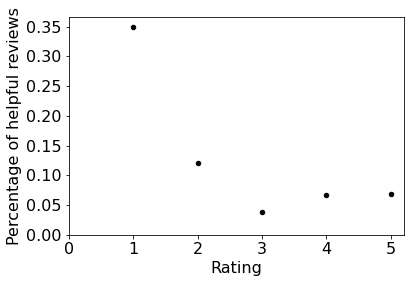

In [37]:
#Q19: What is the relationship between the rating and the likelihood of the review being helpful?
rating_vs_reviews = find_rating_vs_reviews('num_helpful')
from_dict_to_scatter(rating_vs_reviews, a = 'Rating', b = 'Percentage of helpful reviews')

In [38]:
#Q20: Find the average rating of each product.
def find_average_rating(reviews = reviews):
    bucket = {}
    keys = read_files()
    for key in keys:
        ratings = 0
        numbers = 0
        for review in reviews:
            if getattr(review, 'asin') == key:
                ratings += getattr(review, 'rating')
                numbers += 1
                avg_rating = ratings/numbers
        bucket[read_files()[key]] = avg_rating
    return bucket
org_dict = find_average_rating()
org_dict

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


In [39]:
def find_average_rating_2():
    bucket = {}
    keys = read_files()
    for key in keys:
        ratings = 0
        numbers = 0
        for review in reviews:
            if getattr(review, 'asin') == key:
                ratings += getattr(review, 'rating')
                numbers += 1
                avg_rating = ratings/numbers
        bucket[key] = avg_rating
    return bucket
ratings = find_average_rating_2()

def find_numbers_of_reviews():
    keys = read_files()
    bucket = {}
    for key in keys:
        ratings = 0
        numbers = 0
        for review in reviews:
            if getattr(review, 'asin') == key:
                numbers += 1
        bucket[key] = numbers
    return bucket
num_reviews = find_numbers_of_reviews()


{11: 4.7272727272727275,
 165: 4.6909090909090905,
 61: 4.590163934426229,
 1: 5.0,
 126: 4.666666666666667,
 174: 4.603448275862069,
 12: 4.583333333333333,
 47: 4.574468085106383,
 975: 4.6,
 15: 4.866666666666666,
 6: 3.8333333333333335,
 2401: 4.506039150354019}

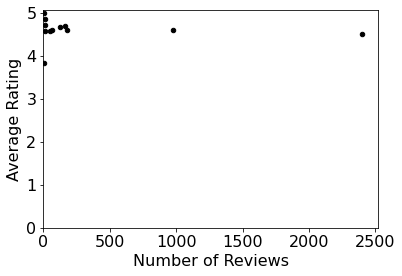

In [40]:
#Q21: What is the relationship between the number of reviews and the average rating of a product?
dict_1 = {}
values = list(ratings.values())
keys = list(num_reviews.values())
for i in range(len(keys)):
    dict_1[keys[i]] = values[i]
from_dict_to_scatter(dict_1, a = 'Number of Reviews', b = 'Average Rating')
dict_1

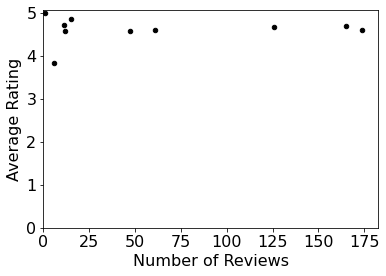

In [41]:
#Q22: Remove the outliers from the last plot.
def remove_outliers():
    for i in list(dict_1.keys()):
        if i > 500:
            dict_1.pop(i)
    return dict_1
dict_2 = remove_outliers()
from_dict_to_scatter(dict_2, a = 'Number of Reviews', b = 'Average Rating')

In [42]:
def reverse_dict(org_dict):
    dict_1 = {}
    keys = list(org_dict.keys())
    values = list(org_dict.values())
    for i in range(len(keys)):
        dict_1[values[i]] = keys[i]
    return dict_1

def find_month_reviews(product):
    asin_name = reverse_dict(read_files())[product]
    keys = []
    bucket = {}
    for review in reviews:
        if not getattr(review, 'date')[5:7] in keys:
            keys.append(getattr(review, 'date')[5:7])
    keys = sorted(keys)
    for key in keys:
        nums = 0
        for review in reviews:
            if getattr(review, 'date')[5:7] == key and getattr(review, 'asin') == asin_name:
                nums += 1
        bucket[key] = nums
    return bucket

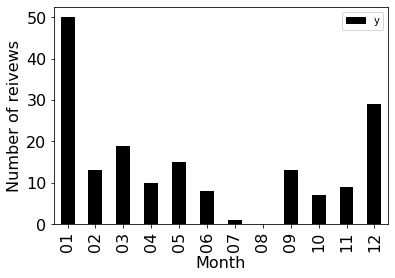

In [43]:
#Q23: What is the relationship between the month and the total number of reviews for the product 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case' for each month?
dict_1 = find_month_reviews('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case')
from_dict_to_bar_chart(dict_1, a = 'Month', b = 'Number of reivews')


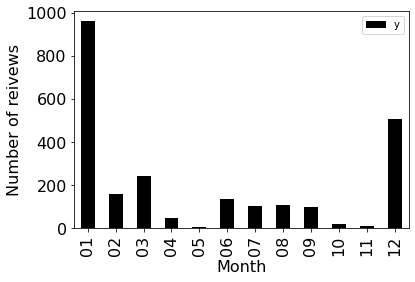

In [44]:
#Q24: What is the relationship between the month and the total number of reviews for the product 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta' for each month?
dict_1 = find_month_reviews('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')
from_dict_to_bar_chart(dict_1, a = 'Month', b = 'Number of reivews')

In [45]:
def real_file(x):
    if x[0] != '.':
        return x
    
def find_paths_filter_dot(i = "data"):
    list_1 = []
    for obj in os.listdir(i):
        if obj[0] != '.':
            list_1.append(os.path.join(i, obj))
    return(sorted(list_1, reverse = True))    

In [46]:
def find_all_path(path):
    list_1 = []
    list_2 = []
    for file in find_paths_filter_dot(i = path):
        if os.path.isdir(file):
            list_1 = list_1 + find_all_path(file)
        else:
            list_1.append(file)
    
    return list_1

In [47]:
#Q25: List the paths in the very_helpful directory of rating4 of broken_file.
path = os.path.join('broken_file','rating4','very_helpful')
find_all_path(path)

['broken_file/rating4/very_helpful/very_helpful.json']

In [48]:
#Q26: List the paths of all the files in the rating5 directory of broken_file.
path = os.path.join('broken_file','rating5')
find_all_path(path)

['broken_file/rating5/others.json', 'broken_file/rating5/helpful/helpful.json']

In [49]:
#Q27: List the paths of all the files in the broken_file directory.
find_all_path('broken_file')

['broken_file/rating5/others.json',
 'broken_file/rating5/helpful/helpful.json',
 'broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json',
 'broken_file/rating3/others/others.json',
 'broken_file/rating3/long/long.json',
 'broken_file/others.json']

In [50]:
#Q28: Combine all the files in broken_file directory and find the number of unique products being reviewed in these files.



def read_broken_files(path = 'broken_file'):
    list_1 = find_all_path(path)
    dict_1 = {}
    for file in list_1:
        if file.endswith('.json'):
            f = open(file, encoding = "utf-8")
            reader = json.load(f)
            dict_1 = {**reader, **dict_1}
    return dict_1
            
def write_broken_files(broken_jsons = read_broken_files()):
    f = open(os.path.join("data", "broken_file_trial.json"), "w", encoding="utf-8")
    f.write(json.dumps(broken_jsons))
    f.close()

write_broken_files()

In [51]:
# broken_jsons = read_broken_files()
# f = open(os.path.join("data", "broken_file_trial.json"), "w", encoding="utf-8")
# f.write(json.dumps(broken_jsons))
# f.close()

In [52]:
#Q28: Combine all the files in broken_file directory and find the number of unique products being reviewed in these files.
broken_reviews = get_reviews('review3.csv','broken_file_trial.json')

def find_unique_products():
    keys = []
    reviews = broken_reviews
    for review in broken_reviews:
        asins = review.asin
        if not asins in keys:
            keys.append(asins)
    return len(keys)

find_unique_products()

1

In [53]:
#Q29: Combine all the files in the directories data and broken_file, and find the total number of reviews.
def find_total_reviews():    
    reviews = sort_reviews()
    new_reviews = broken_reviews
    new_reviews = new_reviews + reviews
    os.remove(os.path.join('data','broken_file_trial.json'))
    return new_reviews


new_reviews = find_total_reviews()
len(new_reviews)

Some of the json files are broken.


4995

In [54]:
def find_average_rating_change(name = 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'):
    org_rating = org_dict[name]
    new_rating = find_average_rating(reviews = new_reviews)[name]
    changes = (new_rating-org_rating) / org_rating
    return changes * 100

In [55]:
#Q30: What is the percentage of change in the average rating changed for the product 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta', because of the addition of the new data?
find_average_rating_change()

-0.039407079451942564